In [7]:
import dotenv
import bluequbit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city

In [2]:
TOKEN = dotenv.dotenv_values(".env")["TOKEN"]

In [4]:
qc = QuantumCircuit.from_qasm_file('quasms\P1_little_peak.qasm')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\danie\AppData\Local\Temp\ipykernel_35196\1337139519.py:1: SyntaxWarning: invalid escape sequence '\P'
  qc = QuantumCircuit.from_qasm_file('quasms\P1_little_peak.qasm')


In [5]:
bq = bluequbit.init(TOKEN) # <-- BlueQubit Magic

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


In [6]:
job = bq.run(qc, job_name="P1 State Vector") # <-- BlueQubit Magic
state_vector = job.get_statevector() # <-- BlueQubit Magic

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: ZzjsZUsMmH1WWfT8, name: P1 State Vector, device: cpu, run status: COMPLETED, created on: 2025-04-12 17:00:18 UTC, cost: $0.00, run time: 9 ms, queue time: 103 ms, num qubits: 4


Statevector: [ 0.08637287+7.55095542e-09j  0.26582837+2.32394548e-08j
 -0.02806425-3.80359880e-17j -0.08637288-1.17062746e-16j
 -0.02806425+3.11622296e-17j -0.08637288+9.59074892e-17j
  0.00911863-7.97175659e-10j  0.02806425-2.45345455e-09j
  0.26582837+2.32394548e-08j  0.81813568+7.15236936e-08j
 -0.08637288-1.17062746e-16j -0.2658284 -3.60282102e-16j
 -0.08637288+9.59074892e-17j -0.2658284 +2.95172903e-16j
  0.02806425-2.45345455e-09j  0.08637288-7.55095719e-09j]


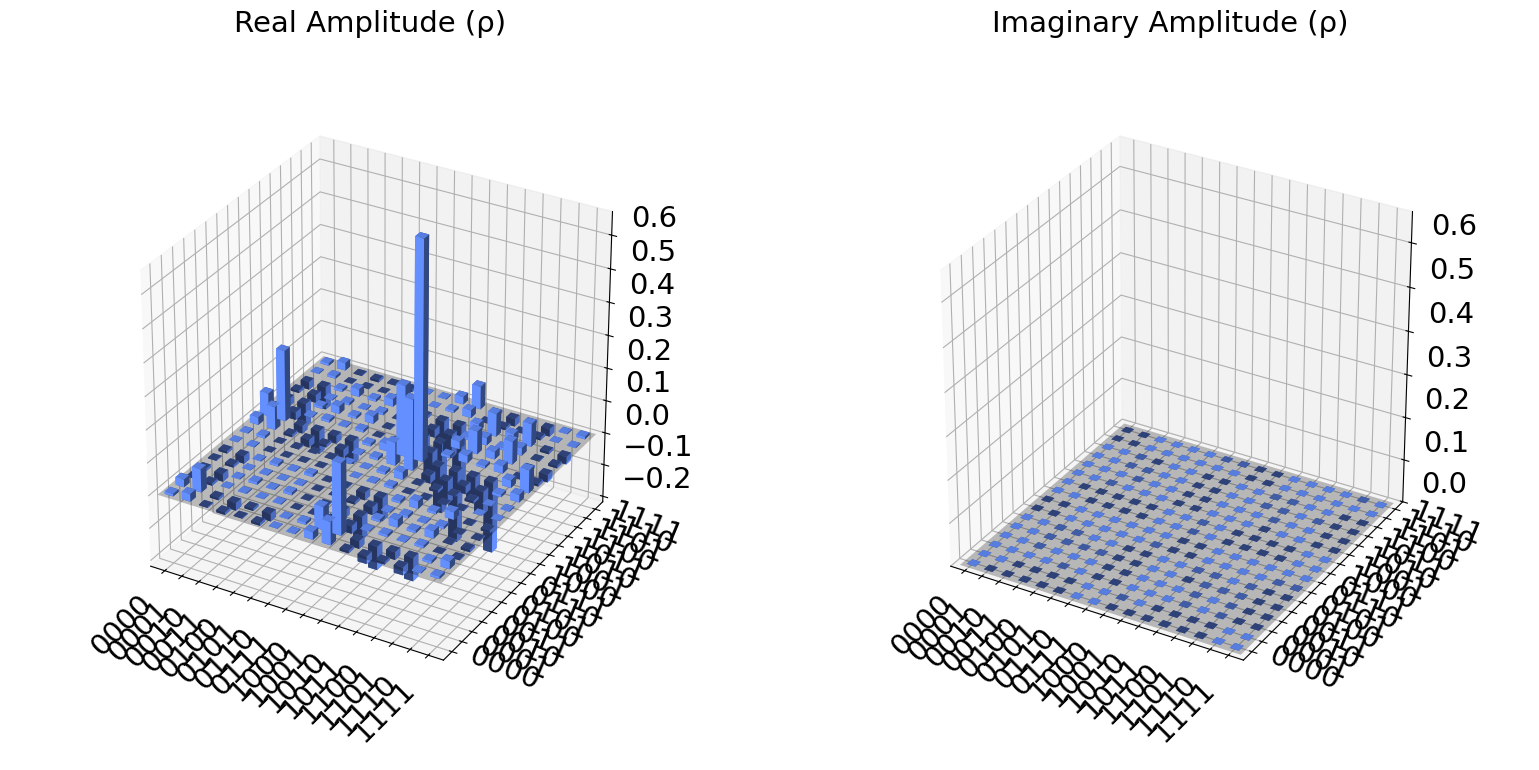

In [8]:
print("Statevector:", state_vector)
# Plot opcional
plot_state_city(state_vector)

In [9]:
job = bq.run(qc, job_name="P1 Counts Peak Bit String", shots=1024) # <-- BlueQubit Magic
results = job.get_counts() # <-- BlueQubit Magic
print("Counts:", results)

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: wsjJ4LdIgUFrt2LY, name: P1 Counts Peak Bit String, device: cpu, run status: COMPLETED, created on: 2025-04-12 17:05:17 UTC, cost: $0.00, run time: 5 ms, queue time: 97 ms, num qubits: 4
Counts: {'0000': 8, '0001': 76, '0011': 9, '0101': 11, '0111': 1, '1000': 76, '1001': 673, '1010': 3, '1011': 75, '1100': 7, '1101': 74, '1110': 1, '1111': 10}


In [11]:
peak_bitstring = max(results, key=results.get)
print("Peak bitstring:", peak_bitstring)

Peak bitstring: 1001


In [13]:
inverse_bitstring = min(results, key=results.get)
print("Inverse bitstring:", inverse_bitstring)

Inverse bitstring: 0111
